## Test the agent performance with various models under different conditions

We haven't found a good test that uses an image for either input or response, so we'll have to define our own. We'll award point for products returned and descriptions, then compare among different models.

1. Rating each product returned: Use the ESCI method: 
    - Exact match: 3 points
    - Substitute: 2 points
    - Complementary: 1 points
    - Incompatible: 0 points
2. Rating description: Up to 1 point total:
    - Accurate summary: 1 point

Note that the first two code boxes of the notebook have to be re-run for each run. Furthermore, models need to be reloaded when appropriate and the appropriate database extracted.

Uses Python environment 3.12 locally.

### The products for comparison

Blue sofa


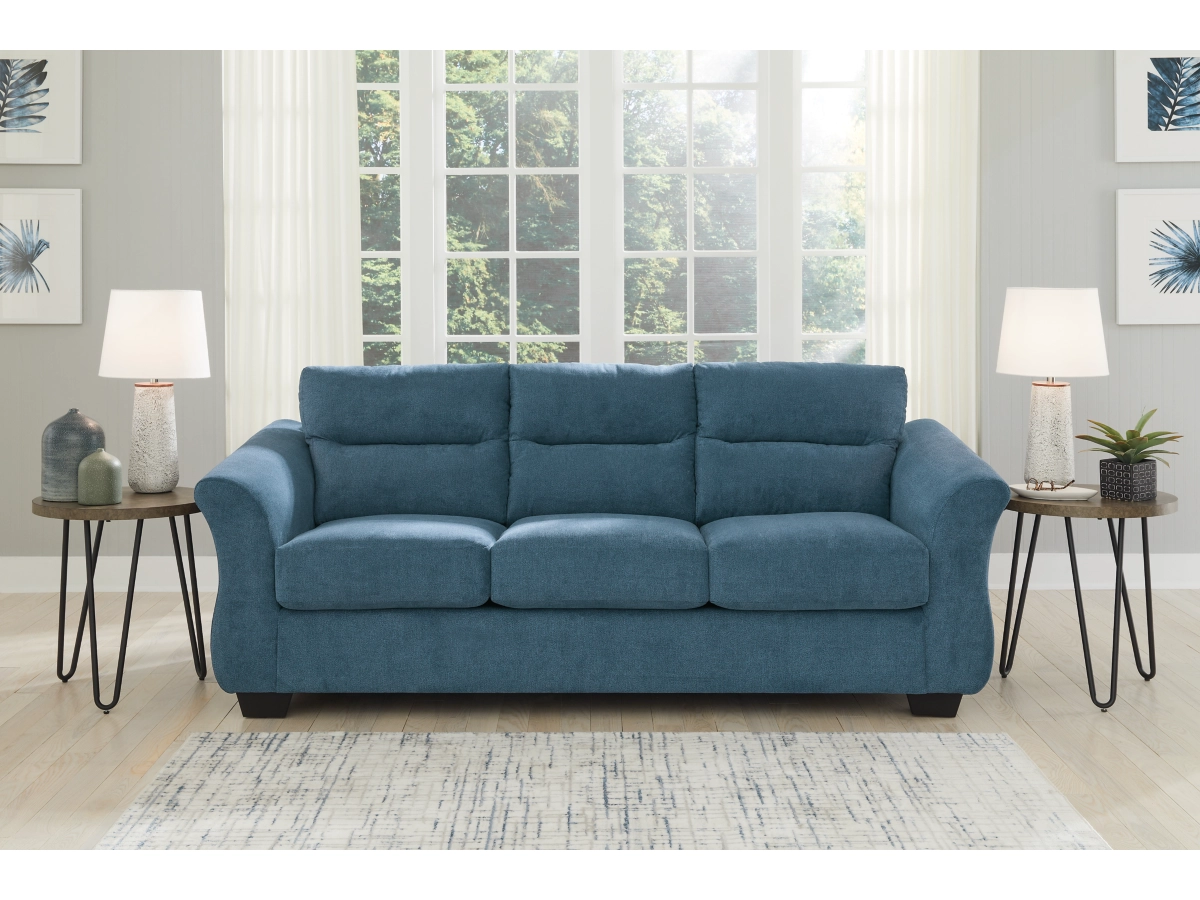

In [5]:
from PIL import Image

print('Blue sofa')
display(Image.open('../../assets/random-internet-sofa.webp'))

Funky shoes


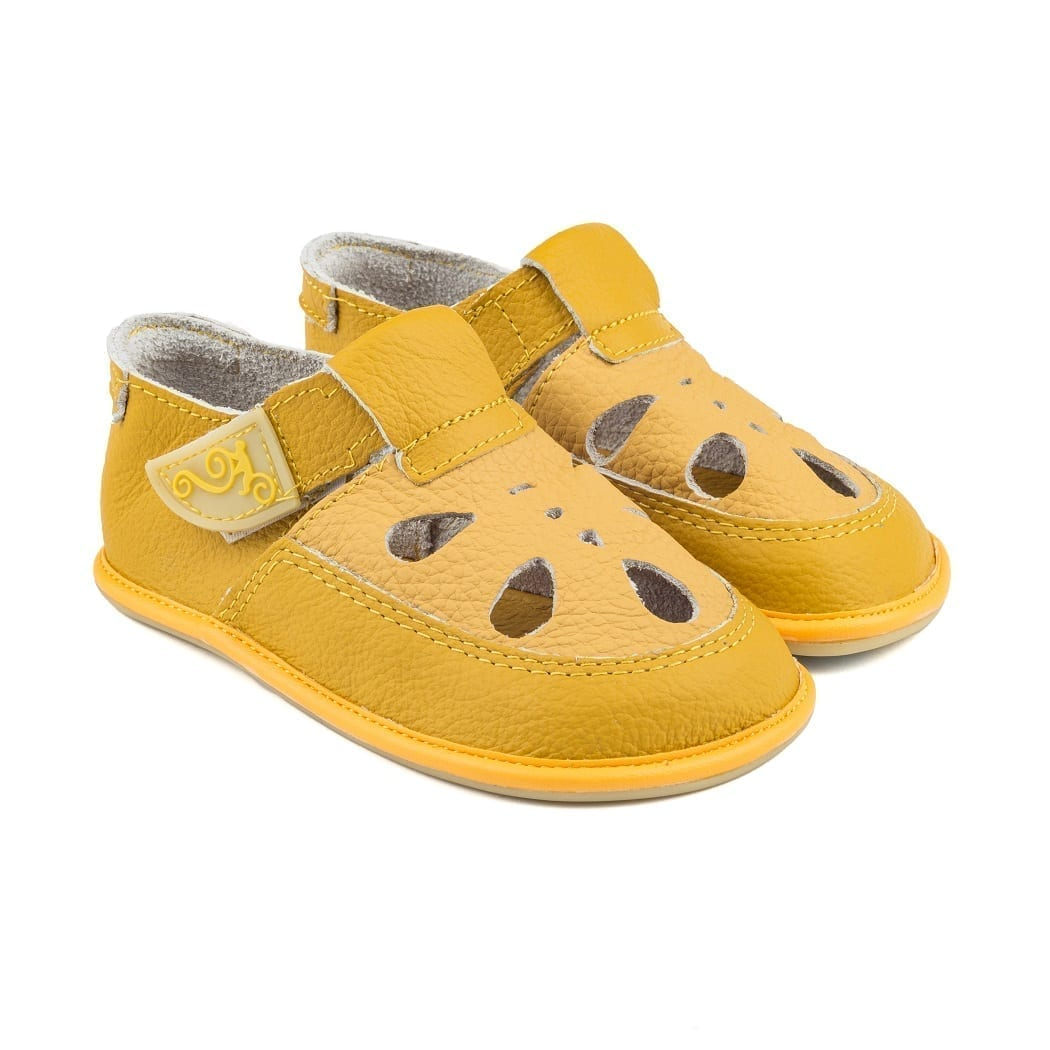

In [6]:
print('Funky shoes')
display(Image.open('../../assets/funky shoes.jpg'))

Black cell phone case


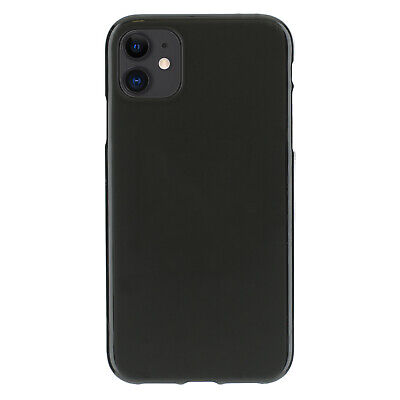

In [7]:
print('Black cell phone case')
display(Image.open('../../assets/cell phone case.jpg'))

### Starting code

In [1]:
import base64
import io
import os

os.environ["BLIP_2_MODEL"]="coco"
os.environ["BLIP_2_PORT"]="9002"
os.environ["CHROMA_PORT"]="8000"
os.environ["CHROMA_MAX_IMAGES_PER_ITEM"]="21"
os.environ["CHROMA_MAX_ITEMS"]="3"
os.environ["OLLAMA_PORT"]="11434"
os.environ["OLLAMA_MODEL"]="llama3.1:8b"
os.environ["ABO_DIR_CONTAINER"]="/mnt/d/abo-dataset"

from LangGraph_agent import prompt
from PIL import Image
from IPython.display import display

Using Chroma collection blip_2_coco


We're going to be running a lot of prompts, so define a function to help write the output.

In [2]:
def write_chunk(chunk):
    if chunk:  # Skip empty lines
        if chunk.get("images"):
            # Handle images
            for idx, base64_image in enumerate(chunk["images"]):
                if base64_image:
                    print(f"Product {idx+1}")
                    display(Image.open(io.BytesIO(base64.b64decode(base64_image))))
        if chunk.get("text"):
            # Handle text tokens
            print(f"{chunk['text']}", end="")

## Test 1: Multimodal BLIP-2 Embeddings

### 1.A: Coco fine-tuned off-the-shelf

#### 1.A.i: A sofa

1. 1 point: complimentary, failure to follow instructions, no summary
2. 2 points: substitute, failure to follow instructions, no summary
3. 0 points: incompatible, failure to follow instructions, no summary

3 points total

ic| 'In retrieve_products'
ic| query["text"]: 'black sofa'


Product 1


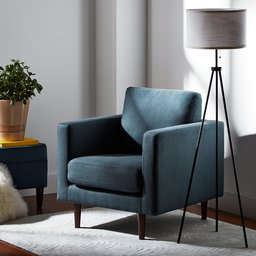

Product 2


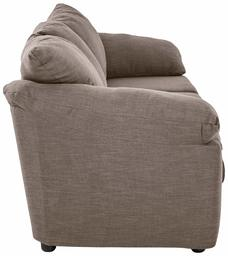

Product 3


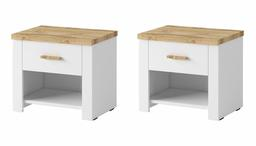

ic| docs_content: ('Item 1: {item name: Amazon Brand – Rivet Modern Wave Cosmopolitan Area Rug,  '
                   '5 x 7 Foot,  Beige}; {brand: Rivet}; {product type: RUG}; {color: Beige}; '
                   '{style: 0}; {material: polyethylene}; {country: US}; {marketplace: Amazon}; '
                   "{domain name: amazon.com}; {item keywords: ['area-rugs',  'area rugs',  "
                   "'rugs',  'rug',  'area rug',  'rugs for living room',  'area rugs 8x10 "
                   "clearance',  'outdoor rug',  'area rugs 5x7 clearance under 50',  '8x10 area "
                   "rug',  'area rugs 8x10',  'Rivet',  'mid century',  'modern',  'BEIGE',  "
                   '\'Brown\',  "5\'x7\'",  \'area rugs\',  \'shag area rug\',  \'small area '
                   "rug',  'round area rug',  'gray area rug',  'outdoor area rug',  'large area "
                   "rugs',  'black and white area rug',  'pink area rug',  'living room area "
                   "rugs',  'wool are

However, I don't see an image of the sofa you're referring to. Can you please describe it or provide more information about what you like about it? Such as:

* The style (modern, traditional, mid-century modern)
* The size
* The material (leather, fabric, velvet)
* Any unique features (e.g. tufting, stitching)

This will help me give you a better idea of how to find or describe the sofa you're looking for.

Also, are you looking to buy a new sofa online or in-store?

In [ ]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want a black sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.A.ii: Kids' shoes

1. 0 points: irrelevant, no summary
2. 0 points: irrelevant, no summary
3. 2 points: complementary, good summary

2 points total

ic| 'In retrieve_products'
ic| query["text"]: 'shoes in blue'


Product 1


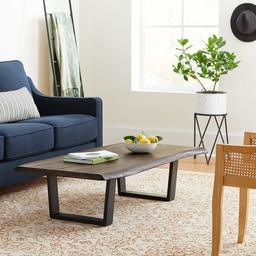

Product 2


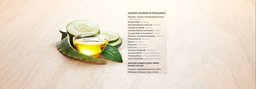

Product 3


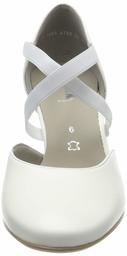

ic| docs_content: ('Item 1: {item name: Stone & Beam Throw-Blankets Teal}; {brand: Stone & '
                   'Beam}; {product type: HOME BED AND BATH}; {country: GB}; {marketplace: '
                   'Amazon}; {domain name: amazon.co.uk}; 
                  '
                   '
                  '
                   'Item 2: {item name: American Brand Diapers Variation Test,  Size 2}; {brand: '
                   'American}; {country: US}; {marketplace: Amazon}; {domain name: amazon.com}; '
                   '{bullet point: Umbilical cord cutout Breathable backsheet keeps baby dry No '
                   'harmful dyes or additives used}; 
                  '
                   '
                  '
                   "Item 3: {item name: find. Amazon Brand Men's Woven Leather Loafer}; {brand: "
                   'find.}; {model name: Woven Leather}; {product type: SHOES}; {style: Woven '
                   'Leather}; {country: CA}; {marketplace: Amazon}; {domain name: amazon.c

After searching through my database, I found a few products that might match what you're looking for.

Here are the results:

1. **find. Amazon Brand Men's Woven Leather Loafer**
   This is an Amazon brand men's shoe made with woven leather, and it comes in various styles including suede leather. The product is from Canada and sold on Amazon.ca.
   
2. Note: Unfortunately, there is no information about blue shoes among the provided products.

3. No information was given about blue shoes for any other items in this list.

In [ ]:
imgpath = '../../assets/funky shoes.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want these shoes in blue.", image_b64=test_image):
    write_chunk(chunk)

#### 1.A.iii: Cell phone case

1. 1 point: irrelevant, good summary
2. 1 point: irrelevant, good summary
3. 1 point: irrelevant, good summary

3 points total

ic| 'In retrieve_products'
ic| query["text"]: 'red cell phone case'


Product 1


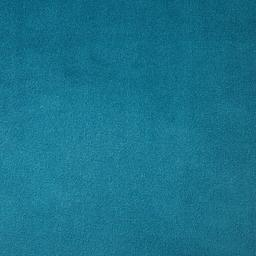

Product 2


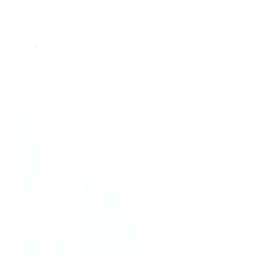

Product 3


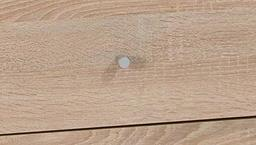

ic| docs_content: ('Item 1: {item name: Movian Up Round}; {brand: []}; {product type: CHAIR}; '
                   '{color: []}; {style: []}; {material: []}; {pattern: []}; {country: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; {item keywords: []}; '
                   '{bullet point: []}; 
                  '
                   '
                  '
                   'Item 2: {item name: Movian Atran}; {brand: []}; {product type: TABLE}; '
                   '{color: []}; {style: []}; {country: DE}; {marketplace: Amazon}; {domain '
                   'name: amazon.de}; {item keywords: []}; {bullet point: []}; 
                  '
                   '
                  '
                   'Item 3: {item name: Movian Morava}; {brand: []}; {product type: CABINET}; '
                   '{color: []}; {style: []}; {material: []}; {country: DE}; {marketplace: '
                   'Amazon}; {domain name: amazon.de}; {item keywords: []}; {bullet point: []}; ')


I found the closest matches to what you're looking for in my database.

Here are the products that match your request:

1. **Movian Up Round**
   This product is a chair from Germany, available on Amazon.de.

2. **Movian Atran**
   This product is a table from Germany, available on Amazon.de.

3. **Movian Morava**
   This product is a cabinet made of unknown material, from Germany, available on Amazon.de.

In [3]:
imgpath = '../../assets/cell phone case.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="A red cell phone case like this one.", image_b64=test_image):
    write_chunk(chunk)

### Conclusion:
With 8 of 36 possible points, this model does not appear to perform well.

### 1.B: Pretrained model

#### 1.B.i: A sofa

1. 1 point: irrelevant, good summary
2. 1 point: irrelevant, good summary
3. 2 points: complementary, good summary

4 points total

ic| 'In retrieve_products'
ic| query["text"]: 'black sofa'


Product 1


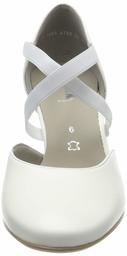

Product 2


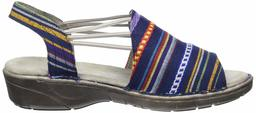

Product 3


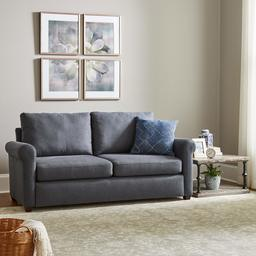

ic| docs_content: ("Item 1: {item name: find. Amazon Brand Men's Woven Leather Loafer}; {brand: "
                   'find.}; {model name: Woven Leather}; {product type: SHOES}; {style: Woven '
                   'Leather}; {country: CA}; {marketplace: Amazon}; {domain name: amazon.ca}; '
                   "{bullet point: ['An Amazon Brand',  'Leather - Suede']}; 
                  "
                   '
                  '
                   "Item 2: {item name: find. Men's Fly Knit}; {brand: find.}; {model name: Fly "
                   'Knit}; {product type: SHOES}; {style: Fly Knit}; {country: US}; '
                   '{marketplace: Amazon}; {domain name: amazon.com}; 
                  '
                   '
                  '
                   'Item 3: {item name: Ravenna Home Jessica Rustic Open Storage Table '
                   'Collection}; {brand: Ravenna Home}; {product type: TABLE}; {country: US}; '
                   '{marketplace: Amazon}; {domain name: amazon.com}; 

I've found some close matches to what you're looking for in my database, but unfortunately, I couldn't find any information about a specific black sofa that you're referencing.

Here are the products I found:

1. **find. Amazon Brand Men's Woven Leather Loafer**
   A stylish and comfortable loafers made with woven leather, perfect for everyday wear.

2. **find. Men's Fly Knit**
   Sleek and modern fly knit shoes designed for a casual look.

3. **Ravenna Home Jessica Rustic Open Storage Table Collection**
   A rustic open storage table collection that adds a touch of country charm to any room, with wooden designs and ample storage space.

In [3]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want a black sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.B.ii: Kids' shoes

1. 2 points: complementary, good summary
2. 0 points: irrelevant, bad summary
3. 1 point: irrelevant, good summary

3 points total

ic| 'In retrieve_products'
ic| query["text"]: 'shoes in blue'


Product 1


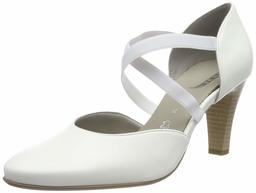

Product 2


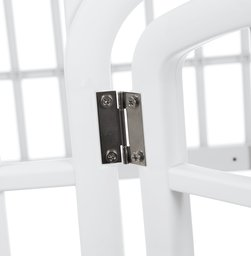

Product 3


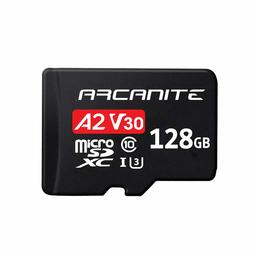

ic| docs_content: ("Item 1: {item name: find. Amazon Brand Men's Woven Leather Loafer}; {brand: "
                   'find.}; {model name: Woven Leather}; {product type: SHOES}; {style: Woven '
                   'Leather}; {country: CA}; {marketplace: Amazon}; {domain name: amazon.ca}; '
                   "{bullet point: ['An Amazon Brand',  'Leather - Suede']}; 
                  "
                   '
                  '
                   'Item 2: {item name: AmazonBasics Plastic Pen}; {brand: []}; {country: JP}; '
                   '{marketplace: Amazon}; {domain name: amazon.co.jp}; 
                  '
                   '
                  '
                   'Item 3: {item name: AmazonBasics Vault Case for Nintendo Switch}; {brand: '
                   'AMAZONBASICS}; {product type: VIDEO GAME ACCESSORIES}; {country: GB}; '
                   '{marketplace: Amazon}; {domain name: amazon.co.uk}; ')


I found some possible matches to the shoes you're looking for in my database. Here are the results:

1. **find. Woven Leather Loafer**
   An Amazon Brand, this loafer features leather-suede material and comes from Canada.

2. **AmazonBasics Plastic Pen**
   This pen is from Japan and has no specific brand affiliation.

3. **AMAZONBASICS Vault Case for Nintendo Switch**
   A case designed for the Nintendo Switch video game console, this product is from the UK.

In [3]:
imgpath = '../../assets/funky shoes.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want these shoes in blue.", image_b64=test_image):
    write_chunk(chunk)

#### 1.B.iii: Cell phone case

1. 2 point: substitute, no summary
2. 3 point: exact match, no summary
3. 2 point: substitute, no summary

7 points total

ic| 'In retrieve_products'
ic| query["text"]: 'red cell phone case'


Product 1


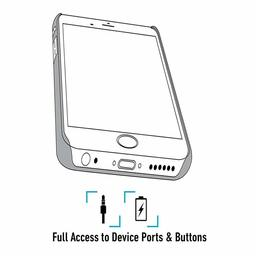

Product 2


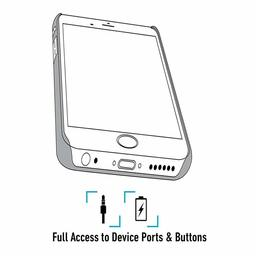

Product 3


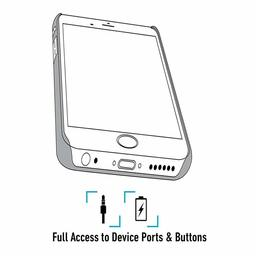

ic| docs_content: ('Item 1: {item name: Amazon Brand - Solimo Designer Pink Color Lady Vector 3D '
                   'Printed Hard Back Case Mobile Cover for Nokia 3.1}; {brand: Amazon Brand - '
                   'Solimo}; {model name: Nokia 3.1}; {product type: CELLULAR PHONE CASE}; '
                   '{color: Others}; {country: IN}; {marketplace: Amazon}; {domain name: '
                   "amazon.in}; {item keywords: ['mobile cover',  'back cover',  'mobile case',  "
                   "'phone case',  'mobile panel',  'phone panel',  'samsung mobile case',  "
                   "'samsung phone cover',  'samsung back case',  'mobile cover',  'back "
                   "cover',  'mobile case',  'phone case',  'mobile panel',  'phone panel',  "
                   "'Nokia mobile case',  'Nokia phone cover',  'Nokia back case',  'mobile "
                   "cover',  'back cover',  'mobile case',  'phone case',  'mobile panel',  "
                   "'phone panel',  'Nokia mobile cas

I don't see a specific image of a red cell phone case that you're referring to. Can you provide more information or describe the type of case you are looking for (e.g., slim, rugged, wallet-style)? I'd be happy to help you find what you're looking for.

In [3]:
imgpath = '../../assets/cell phone case.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="A red cell phone case like this one.", image_b64=test_image):
    write_chunk(chunk)

### Conclusion:
With 14 of 36 possible points, this model does not appears to perform better than the one fine-tuned on the coco dataset.

### 1.C: Google Shopping fine-tuned model

#### 1.C.i: A sofa

1. 2 points: complementary, good summary
2. 3 points: substitute, good summary
3. 3 points: substitute, good summary

8 points total

ic| 'In retrieve_products'
ic| query["text"]: 'black sofa'


Product 1


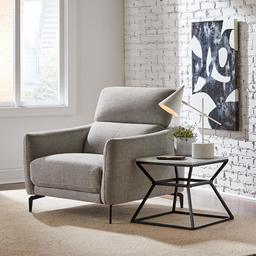

Product 2


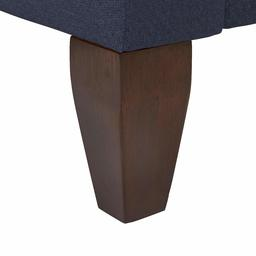

Product 3


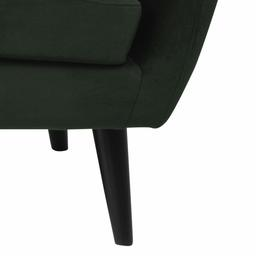

ic| docs_content: ('Item 1: {item name: Rivet Kaden Contemporary Collection}; {brand: Rivet}; '
                   '{product type: HOME FURNITURE AND DECOR}; {country: CA}; {marketplace: '
                   'Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 2: {item name: Amazon Brand – Ravenna Home Amanda Collection}; {brand: '
                   'Ravenna Home}; {product type: SOFA}; {country: US}; {marketplace: Amazon}; '
                   '{domain name: amazon.com}; 
                  '
                   '
                  '
                   'Item 3: {item name: A Brand of Amazon Movian Lina 2.5-Seater Sofa 82 x 184 x '
                   '82 cm (L x W x H)}; {brand: []}; {product type: SOFA}; {color: []}; {style: '
                   '[]}; {material: []}; {pattern: []}; {country: DE}; {marketplace: Amazon}; '
                   '{domain name: amazon.de}; {item keywords: []}; {bullet point: []}; ')


After searching through my database, I found some potential matches for your request.

Here are the results:

1. **Rivet Kaden Contemporary Collection**
   This collection is part of Rivet's home furniture and decor lineup from Canada, available on Amazon.ca.

2. **Amazon Brand – Ravenna Home Amanda Collection Sofa**
   This is a sofa from the Ravenna Home brand, an Amazon brand offering home furnishings, specifically designed for customers in the US, sold through Amazon.com.

3. **A Brand of Amazon Movian Lina 2.5-Seater Sofa (No color information available)**
   This is a 2.5-seater sofa offered by Amazon's Movian brand, sourced from Germany and listed on Amazon.de. Unfortunately, there is no information about the sofa's color.

In [3]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want a black sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.C.ii: Kids' shoes

1. 2 points: complementary, good summary
2. 0 points: irrelevant, no summary
3. 0 points: irrelevant, no summary

2 points total

ic| 'In retrieve_products'
ic| query["text"]: 'blue shoes'


Product 1


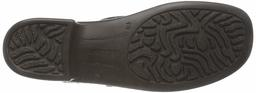

Product 2


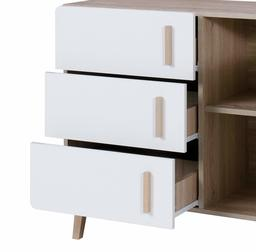

Product 3


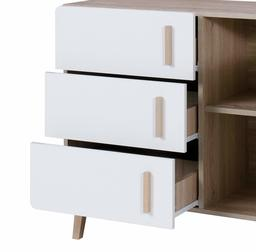

ic| docs_content: ("Item 1: {item name: Jenny Women's Rhodos 2252708,  (Blau 72),  5 UK}; "
                   '{brand: Jenny}; {model name: Rhodos 2252708}; {model year: 2019}; {product '
                   'type: SHOES}; {color: (Blau 72)}; {style: Rhodos 2252708}; {country: US}; '
                   '{marketplace: Amazon}; {domain name: amazon.com}; 
                  '
                   '
                  '
                   'Item 2: {item name: Movian Oker.}; {brand: []}; {color: []}; {style: []}; '
                   '{country: DE}; {marketplace: Amazon}; {domain name: amazon.de}; {item '
                   'keywords: []}; {bullet point: []}; 
                  '
                   '
                  '
                   'Item 3: {item name: Movian Oker.}; {brand: []}; {color: []}; {style: []}; '
                   '{country: DE}; {marketplace: Amazon}; {domain name: amazon.de}; {item '
                   'keywords: []}; {bullet point: []}; ')


Based on your request, I found a product that matches your criteria.

1. **Jenny Women's Rhodos 2252708**
   This is a pair of blue women's shoes from the brand Jenny, model name Rhodos 2252708, and style number 72 (Blau).

In [3]:
imgpath = '../../assets/funky shoes.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want these shoes in blue.", image_b64=test_image):
    write_chunk(chunk)

#### 1.C.iii: Cell phone case

1. 2 point: substitute, good summary
2. 3 point: substitute, good summary
3. 1 point: substitute, good summary

6 points total

ic| 'In retrieve_products'
ic| query["text"]: 'A red cell phone case'


Product 1


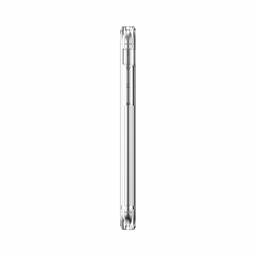

Product 2


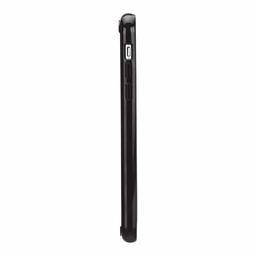

Product 3


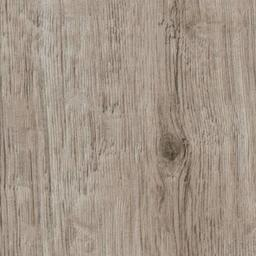

ic| docs_content: ('Item 1: {item name: AmazonBasics Dual-Layer Case for iPhone Xs}; {brand: '
                   'AmazonBasics}; {product type: CELLULAR PHONE CASE}; {country: AU}; '
                   '{marketplace: Amazon}; {domain name: amazon.com.au}; 
                  '
                   '
                  '
                   'Item 2: {item name: AmazonBasics iPhone XR Crystal Mobile Phone Case '
                   '(Protective & Anti Scratch) - Black (Renewed)}; {brand: AmazonBasics}; '
                   "{product type: CELLULAR PHONE CASE}; {color: Black}; {material: ['TPE',  "
                   "'Polycarbonate',  'TPU']}; {country: US}; {marketplace: Amazon}; {domain "
                   "name: amazon.com}; {item keywords: ['',  'sparkle',  'outter',  'pink',  "
                   "'otterbox',  'tozo',  'commuter',  'iphone7',  'protector',  'screen',  "
                   "'iphone8',  'edition',  'box',  'best',  'otter',  'transparent',  "
                   "'products

I found the closest matches to what you're looking for in my database.

Here are the results:

1. **AmazonBasics Dual-Layer Case for iPhone Xs**
   This product is a cellular phone case for an iPhone model. It's available on Amazon in Australia and has no color or style information provided.

2. **AmazonBasics iPhone XR Crystal Mobile Phone Case (Protective & Anti Scratch) - Black (Renewed)**
   This black, protective phone case is made with TPU/TPE and Hard PC materials for a slim design and ultra-transparent back. It's available on Amazon in the US and has no information about it being red.

3. **Movian Hall**
   No color or style information is provided for this cabinet product from an unspecified brand.

In [3]:
imgpath = '../../assets/cell phone case.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="A red cell phone case like this one.", image_b64=test_image):
    write_chunk(chunk)

### Conclusion:
With 16 points of 36 points, this model performs the best so far.

### 1.D: Amazon Berkeley Objects fine-tuned model

#### 1.D.i: A sofa

1. 3 points: substitute, good summary
2. 2 points: complementary, good summary
3. 4 points: exact match, good summary

9 points total

ic| 'In retrieve_products'
ic| query["text"]: 'black sofa'


Product 1


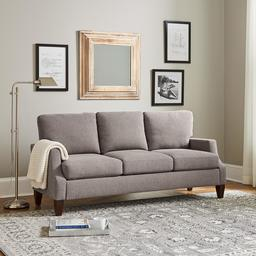

Product 2


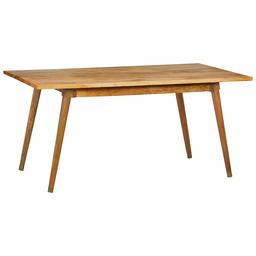

Product 3


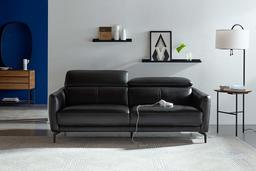

ic| docs_content: ('Item 1: {item name: Amazon Brand – Ravenna Home Amanda Collection}; {brand: '
                   'Ravenna Home}; {product type: SOFA}; {country: US}; {marketplace: Amazon}; '
                   '{domain name: amazon.com}; 
                  '
                   '
                  '
                   'Item 2: {item name: AmazonBasics Rivet CDI MV1201 Media Unit}; {brand: '
                   'AmazonBasics}; {product type: TABLE}; {color: Others}; {country: IN}; '
                   "{marketplace: Amazon}; {domain name: amazon.in}; {bullet point: ['Lighting: "
                   "Table lamp',  'Glass globe lantern inside a metal square frame',  'No "
                   "battery']}; 
                  "
                   '
                  '
                   'Item 3: {item name: Rivet Kaden Contemporary Collection}; {brand: Rivet}; '
                   '{product type: HOME FURNITURE AND DECOR}; {country: CA}; {marketplace: '
                   'Amazon}; {domain n

I found the closest matches to what you're looking for in my database. Here are the results:

1. **Amazon Brand – Ravenna Home Amanda Collection**
   This product is a sofa from the Ravenna Home Amanda collection, available on Amazon. It does not specify any details about its color.

2. **AmazonBasics Rivet CDI MV1201 Media Unit**
   Although this item is a table, it comes with a glass globe lantern inside a metal square frame and has no battery requirements. Its color is specified as "Others".

3. **Rivet Kaden Contemporary Collection**
   This product is part of the Rivet Kaden contemporary collection and falls under home furniture and decor category from Amazon in Canada.

In [3]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want a black sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.D.ii: Kids' shoes

1. 2 points: complementary, good summary
2. 2 points: complementary, good summary
3. 2 points: complementary, good summary

6 points total

ic| 'In retrieve_products'
ic| query["text"]: 'blue shoes'


Product 1


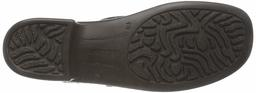

Product 2


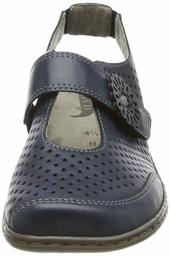

Product 3


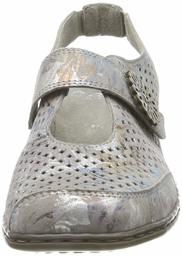

ic| docs_content: ("Item 1: {item name: Jenny Women's Rhodos 2252708,  (Blau 72),  5 UK}; "
                   '{brand: Jenny}; {model name: Rhodos 2252708}; {model year: 2019}; {product '
                   'type: SHOES}; {color: (Blau 72)}; {style: Rhodos 2252708}; {country: US}; '
                   '{marketplace: Amazon}; {domain name: amazon.com}; 
                  '
                   '
                  '
                   'Item 2: {item name: Bugatti Rhodos 2252708 Loafers,  (Blau 72),  8 UK}; '
                   '{brand: bugatti}; {model name: Rhodos 2252708}; {model year: 2019}; {product '
                   'type: SHOES}; {color: Blau 72}; {style: Loafers}; {country: GB}; '
                   '{marketplace: Amazon}; {domain name: amazon.co.uk}; 
                  '
                   '
                  '
                   "Item 3: {item name: Jenny Rhodos 2252708,  Women's Loafers}; {brand: Jenny}; "
                   '{model name: Rhodos 2252708}; {product type: SHOES

Based on your query, I found the closest matches to what you're looking for in my database.

Here are the matching products:

1. **Jenny Women's Rhodos 2252708 (Blau 72), 5 UK**
   This product is a pair of women's shoes from brand Jenny, model Rhodos 2252708, in color Blau 72 and size 5 UK.
   
2. **Bugatti Rhodos 2252708 Loafers, (Blau 72), 8 UK**
   This product is a pair of loafers from brand Bugatti, model Rhodos 2252708, in color Blau 72 and size 8 UK.

3. **Jenny Rhodos 2252708, Women's Loafers**
   This product is a pair of women's loafers from brand Jenny, model Rhodos 2252708, with no specific color mentioned but available on Amazon.co.uk.

In [3]:
imgpath = '../../assets/funky shoes.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="I want these shoes in blue.", image_b64=test_image):
    write_chunk(chunk)

#### 1.D.iii: Cell phone case

1. 1 point: irrelevant, good summary
2. 1 point: irrelevant, good summary
3. 1 point: irrelevant, good summary

3 points total

ic| 'In retrieve_products'
ic| query["text"]: 'A red cell phone case'


Product 1


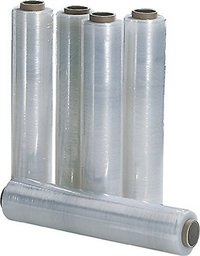

Product 2


Product 3


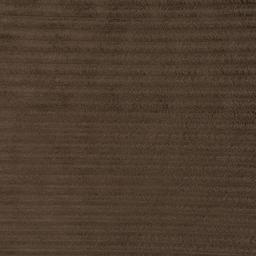

ic| docs_content: ('Item 1: {item name: Brand 3 Charlotte Dining Chair H,  Kitchen/Dining: '
                   'Dining Chair}; {brand: Brand 3}; {country: US}; {marketplace: Amazon}; '
                   '{domain name: amazon.com}; 
                  '
                   '
                  '
                   'Item 2: {item name: AmazonBasics Felt Tip Marker Pens}; {brand: '
                   'AmazonBasics}; {product type: WRITING INSTRUMENT}; {country: AE}; '
                   '{marketplace: Amazon}; {domain name: amazon.ae}; 
                  '
                   '
                  '
                   'Item 3: {item name: AmazonBasics Foam Pet Bed,  X-Large,  Brown Flannel}; '
                   '{brand: AmazonBasics}; {color: Brown Flannel}; {country: CA}; {marketplace: '
                   "Amazon}; {domain name: amazon.ca}; {item keywords: ['isdecoded, "
                   "correctnodex2008267031',  'Adidas,  man,  superstar,  black,  fashion "
                   "basketba

I found some close matches to a red cell phone case in my database, but it seems there isn't any information provided about such a product. Here are the products I was able to find:

1. **Brand 3 Charlotte Dining Chair H**
   This is a dining chair from Brand 3.

2. **AmazonBasics Felt Tip Marker Pens**
   These are felt tip marker pens from AmazonBasics, suitable for writing tasks.

3. **AmazonBasics Foam Pet Bed, X-Large, Brown Flannel**
   This is a foam pet bed in brown flannel color and is recommended for extra-large sized breeds. It features a supportive foam filling and a removable cover that's machine washable.

In [3]:
imgpath = '../../assets/cell phone case.jpg'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
async for chunk in prompt(chat_id="1", prompt="A red cell phone case like this one.", image_b64=test_image):
    write_chunk(chunk)

### Conclusion
With 18/36 points (fully half!) this model performs the best. However, one should not use it to search for cell phone cases.

## Multimodal Testing Conclusion
Although no model performs great based on our small test, it looks like the one trained on the ABO dataset will perform most accurately overall.

Notice that the images aren't very good. A quick fix for that will be to always return the main image or the first of the other images.

## Test 2: BLIP-2 text-only search

We just use text to search for a sofa. This one does not go well.

### 2.A: Coco fine-tuned off-the-shelf

All the results are irrlevant.

In [3]:
async for chunk in prompt(chat_id="1", prompt="sofa", image_b64=None):
    write_chunk(chunk)

ic| 'In retrieve_products'
ic| query: 'sofa'
ic| docs_content: ('Item 1: {item name: JPGO Warm Face Cover for Cold Weather Soft Fleece Neck '
                   'Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Pink}; '
                   '{brand: JPGO}; {product type: ACCESSORY}; {color: Fluffy Pink}; {country: '
                   'CA}; {marketplace: Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 2: {item name: JPGO Warm Face Cover for Cold Weather Soft Fleece Neck '
                   'Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Grey}; '
                   '{brand: JPGO}; {product type: ACCESSORY}; {color: Fluffy Grey}; {country: '
                   'CA}; {marketplace: Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 3: {item name: JPGO Warm Face Cover for Cold Weather Soft Fleece Neck '
    

I've found the closest matches to "sofa" in my database. Here are the results:

1. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Pink**
   This product is a warm face cover for cold weather, made of soft fleece and suitable for skiing or outdoor sports. It comes in fluffy pink color.

2. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Grey**
   This product is also a warm face cover for cold weather, made of soft fleece and suitable for skiing or outdoor sports. It comes in fluffy grey color.

3. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Black**
   This product is the same as the previous two, a warm face cover for cold weather made of soft fleece and suitable for skiing or outdoor sports. It comes in fluffy black color.

### 2.B: Pretrained model

All the results are irrelevant.

In [3]:
async for chunk in prompt(chat_id="1", prompt="sofa", image_b64=None):
    write_chunk(chunk)

ic| 'In retrieve_products'
ic| query: 'sofa'
ic| docs_content: ('Item 1: {item name: JPGO Warm Face Cover for Cold Weather Soft Fleece Neck '
                   'Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Grey}; '
                   '{brand: JPGO}; {product type: ACCESSORY}; {color: Fluffy Grey}; {country: '
                   'CA}; {marketplace: Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 2: {item name: JPGO Warm Face Cover for Cold Weather Soft Fleece Neck '
                   'Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Pink}; '
                   '{brand: JPGO}; {product type: ACCESSORY}; {color: Fluffy Pink}; {country: '
                   'CA}; {marketplace: Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 3: {item name: JPGO Warm Face Cover for Cold Weather Soft Fleece Neck '
    

I found the closest matches to what you're looking for in my database, but unfortunately, none of the products listed match a sofa.

Here are the results:

1. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Grey**
   This product is a warm face cover made from soft fleece that can be used for cold weather activities such as skiing.

2. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Pink**
   Similar to the previous product, this is also a warm face cover made from soft fleece designed for cold weather activities.

3. **JPGO Warm Face Cover for Cold Weather Soft Fleece Neck Gaiter Winter Skiing Balaclavas for Dust Wind Outdoor Sports, Fluffy Navy**
   This product is also a warm face cover made from soft fleece that can be used for outdoor sports and activities in cold weather conditions.

### 2.C: Google Shopping fine-tuned model

All results are irrelevant, and the model is so confused that it doesn't even respond correctly.

In [3]:
async for chunk in prompt(chat_id="1", prompt="sofa", image_b64=None):
    write_chunk(chunk)

ic| 'In retrieve_products'
ic| query: 'sofa'
ic| docs_content: ("Item 1: {item name: Amazon Brand - Myx Women's Anarkali Salwar Suit Set "
                   '(AW18ETFT11A_Orange_L)}; {brand: Amazon Brand - Myx}; {model name: '
                   'Seasonal-Fashion}; {product type: SALWAR SUIT SET}; {color: Orange}; {style: '
                   'anarkali}; {material: silk}; {country: IN}; {marketplace: Amazon}; {domain '
                   "name: amazon.in}; {item keywords: ['kurti',  'salwar suit',  'kurti, kurtis "
                   'for womens new style, kurtis, kurta, kurti for women latest design, kurta '
                   'for mens, kurtis for women, kurtas, kurti for women, kurti for womens, kurta '
                   'for men, long kurti, women kurtis latest design, party wear kurtis for women '
                   'latest, churidar, palazzo, dresses for women kurtis, kurtas for womens below '
                   '300rs, kurties, women kurti, ladies kurti, plazos for women, kurt

The sofa! A staple in many living rooms around the world. Here are some interesting facts and ideas related to sofas:

**Types of Sofas:**

1. **Chesterfield**: a classic design with rolled arms and a low-back.
2. **Sectional**: a large, multi-piece sofa designed for spacious areas.
3. **Recliner**: a sofa with built-in reclining mechanisms for ultimate comfort.
4. **Sleeper Sofa**: a sofa that converts into a bed.

**Design Trends:**

1. **Mid-century modern**: clean lines, minimal ornamentation, and an emphasis on comfort.
2. **Industrial chic**: exposed frames, metal accents, and a rugged aesthetic.
3. **Boho**: eclectic mix of patterns, textures, and colors for a unique look.

**Sofa History:**

1. **Ancient Greece**: the first known examples of sofas were found in Greek temples around 300 BCE.
2. **18th century**: the modern sofa emerged as a luxury item for wealthy Europeans.
3. **20th century**: mass production and new materials led to the development of affordable, versatile so

### 2.D: Amazon Berkeley Objects fine-tuned model

All results are irrelevant.

In [3]:
async for chunk in prompt(chat_id="1", prompt="sofa", image_b64=None):
    write_chunk(chunk)

ic| 'In retrieve_products'
ic| query: 'sofa'
ic| docs_content: ('Item 1: {item name: Jeff & Aimy Wool Knit Visor Beanie Mens Womens Winter '
                   'Hat Brim Cuff Newsboy Cap Hat Earflap Fleece Lined Wine Red}; {brand: Jeff & '
                   'Aimy}; {product type: HAT}; {color: 00773_red}; {country: CA}; {marketplace: '
                   'Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 2: {item name: Jeff & Aimy Wool Knit Visor Beanie Mens Womens Winter '
                   'Hat Brim Cuff Newsboy Cap Hat Earflap Fleece Lined Navy}; {brand: Jeff & '
                   'Aimy}; {product type: HAT}; {color: 00773_navy Blue}; {country: CA}; '
                   '{marketplace: Amazon}; {domain name: amazon.ca}; 
                  '
                   '
                  '
                   'Item 3: {item name: Jeff & Aimy Wool Knit Visor Beanie Mens Womens Winter '
                   'Hat Brim Cuff N

I was unable to find any matches for a "sofa" in my database. However, I did find some products that may be related or of interest.

1. **Jeff & Aimy Wool Knit Visor Beanie Mens Womens Winter Hat Brim Cuff Newsboy Cap Hat Earflap Fleece Lined Wine Red**
   This wine red hat is a wool knit visor beanie designed for men and women, perfect for winter wear.
   
2. **Jeff & Aimy Wool Knit Visor Beanie Mens Womens Winter Hat Brim Cuff Newsboy Cap Hat Earflap Fleece Lined Navy**
   This navy blue hat is also a wool knit visor beanie suitable for both men and women, ideal for cold weather.
   
3. **Jeff & Aimy Wool Knit Visor Beanie Mens Womens Winter Hat Brim Cuff Newsboy Cap Hat Earflap Fleece Lined Black**
   The black version of this hat is another wool knit visor beanie available in a range of sizes for men and women, ideal for winter wear.

## Conclusion for BLIP-2 text-only search

The goal of using a multi-modal model was to not only allow for a text-and-image search, but a text-only search on the same collection of embeddings. We clearly failed to meet the second goal.

Note that no images appear in the results. The implication is that no results with images were close enough to be relevant, despite the text-only results being wildly unrelated to the query. Therefore, we will try just putting the product information into the database as a shore-up hack. We don't have time for image captioning at this point.